# Data Visualization Metamorphosis

### Merged Dataset

--------------

### Sepand Haghighi - Farzad Ramezani

### September 2022

--------------

### Merging

We performed a merge with similarity columns for `1.csv` and `2.csv` datasets. These columns are:

1. Address Union address
2. Flag Union flag
3. Avg_min_between_received_tnx Union avgTimeBetweenRecTnx
4. Avg_min_between_sent_tnx Union avgTimeBetweenSentTnx
5. Sent_tnx Union sentTransactions
6. Received_tnx Union receivedTransactions
7. Number_of_Created_Contracts Union createdContracts
8. Average_of_Unique_Received_From_Addresses Union Average_of_numUniqRecAddress
9. Average_of_Unique_Sent_To_Addresses Union Average_of_numUniqSentAddress
10. min_value_received Union minValReceived
11. max_value_received Union maxValReceived
12. avg_val_received Union avgValReceived
13. min_val_sent Union minValSent
14. max_val_sent Union maxValSent
15. avg_val_sent Union avgValSent
16. total_transactions_including_tnx_to_create_contract Union totalTransactions
17. total_Ether_sent Union totalEtherSent
18. total_ether_received Union totalEtherReceived
19. total_ether_balance Union totalEtherBalance

The cleaned dataset is stored in file `3.csv`

### Loading

In [1]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install pandas>=0.24.2
  !{sys.executable} -m pip -q -q install matplotlib>=3.0.3
  !{sys.executable} -m pip -q -q install seaborn>=0.9.1
  !{sys.executable} -m pip -q -q install numpy>=1.18.5
except:
  pass

In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("Data", "3.csv"))

### Statistics and Distribution 

#### Overall Statistics

In [3]:
df.columns

Index(['Address', 'Flag', 'Avg_min_between_received_tnx',
       'Avg_min_between_sent_tnx', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts',
       'Average_of_Unique_Received_From_Addresses',
       'Average_of_Unique_Sent_To_Addresses', 'min_value_received',
       'max_value_received ', 'avg_val_received', 'min_val_sent',
       'max_val_sent', 'avg_val_sent',
       'total_transactions_including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received', 'total_ether_balance'],
      dtype='object')

In [4]:
len(df.columns)

19

In [5]:
df.describe()

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
count,20302.000000,2.030200e+04,2.030200e+04,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,2.030200e+04,2.030200e+04,2.030200e+04
mean,0.279529,7.991606e+07,1.989844e+06,363.085804,481.494089,2.850901,179.440301,71.121121,28.569304,364.596330,63.640495,5.342059,233.705690,27.054139,847.430795,6.419082e+03,7.213792e+03,7.947074e+02
std,0.448779,1.835776e+08,3.116720e+07,1548.958945,1873.466283,127.920225,901.251215,514.709549,438.088823,9521.482573,2078.889936,211.492553,6418.530186,269.447271,2486.611759,2.569606e+05,2.571737e+05,1.745482e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07
25%,0.000000,8.200000e-01,0.000000e+00,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.269791,0.092155,0.000000,0.033407,0.005917,5.000000,5.400134e-02,8.000000e-01,0.000000e+00
50%,0.000000,7.127525e+03,2.250600e+02,4.000000,8.000000,0.000000,3.000000,2.000000,0.011211,2.000000,0.599991,0.000000,1.894453,0.360359,20.000000,5.468345e+00,9.551110e+00,1.722000e-03
75%,1.000000,4.684945e+07,2.988656e+04,39.000000,47.000000,0.000000,9.000000,9.000000,0.290558,16.817298,3.798540,0.270000,19.000000,4.202148,152.000000,7.525671e+01,9.231312e+01,5.332228e-02
max,1.000000,8.309932e+08,8.291299e+08,10000.000000,10000.000000,9995.000000,9999.000000,9950.000000,25533.614520,800000.000000,283618.831600,25533.614330,611102.014500,25533.614330,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07


#### Overall Distribution

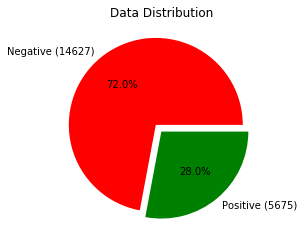

In [6]:
positive_sample = df[(df["Flag"]==1)]
negative_sample = df[(df["Flag"]==0)]
dist = df["Flag"].value_counts()
plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.1, 0], autopct='%1.1f%%')
plt.title("Data Distribution")
plt.show()

⚠️ Dataset is imbalanced

### Comparing Different Features

In [7]:
columns = df.columns[1:]
positive_sample = df[df["Flag"]==1]
negative_sample  = df[df["Flag"]==0].sample(n = len(positive_sample), replace = False)

median_positive = positive_sample[columns].median(skipna=True).round(3)
median_negative = negative_sample[columns].median(skipna=True).round(3)
q25_positive = positive_sample[columns].quantile(q=0.25).round(3)
q25_negative = negative_sample[columns].quantile(q=0.25).round(3)
q75_positive = positive_sample[columns].quantile(q=0.75).round(3)
q75_negative = negative_sample[columns].quantile(q=0.75).round(3)
mean_positive = positive_sample[columns].mean(skipna=True).round(3)
mean_negative = negative_sample[columns].mean(skipna=True).round(3)


def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


def plot_bar(col):
    x = ["Positive", "Negative"]
    data_list = [[mean_positive[col], mean_negative[col]], [median_positive[col], median_negative[col]], [q25_positive[col], q25_negative[col]], [q75_positive[col], q75_negative[col]]]
    titles_list = ["Mean | Ratio(P/N):{0}% | Diff(ABS): {1}", "Median | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.25 | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.75 | Ratio(P/N):{0}% | Diff(ABS): {1}"]
    colors_list = ["b", "g", "y", "r"]
    for index, item in enumerate(data_list):
        ax = plt.subplot(2,2,index + 1)
        rects = ax.bar(x, item, width=0.4, color=colors_list[index])
        autolabel(ax, rects)
        ax.set_ylim([0, 1.2 * max(item)])
        ax.set_title(titles_list[index].format(round(item[0]/item[1] * 100, 1), round(item[0] - item[1], 1)))
    #plt.suptitle(" ".join(col.split("_")).capitalize())
    plt.subplots_adjust(right=2, top=2)
    plt.show()

#### Avergae Min Between Received Transactions

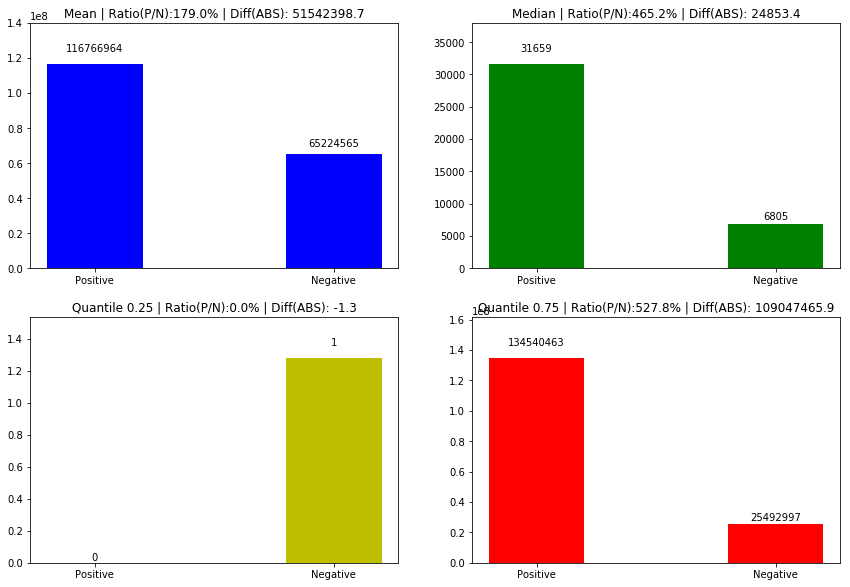

In [8]:
plot_bar("Avg_min_between_received_tnx")

⚠️ We can see that `Avergae Min Between Received Transactions` is significantly higher in `Fraud` transactions

#### Received Transactions

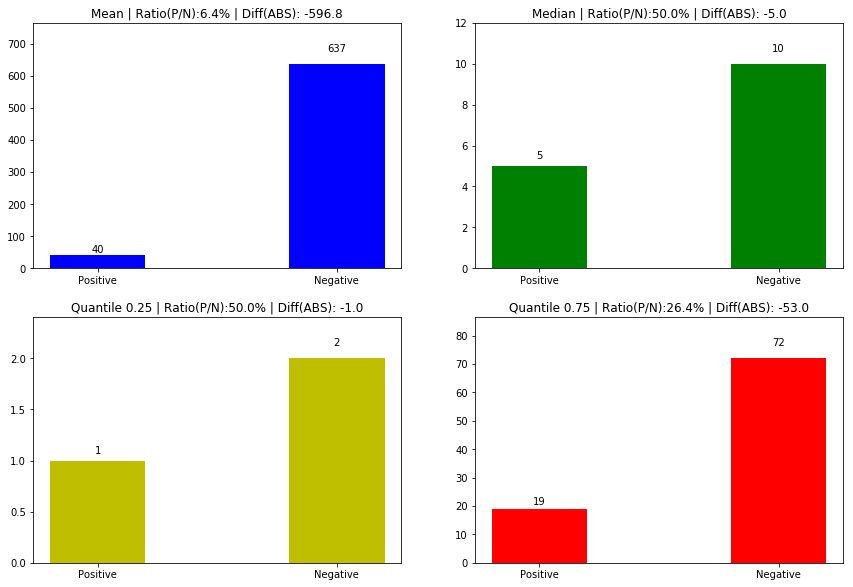

In [9]:
plot_bar("Received_Tnx")

⚠️ We can see that `Received Transactions` is significantly higher in `Non-Fraud` transactions

#### Sent Transactions

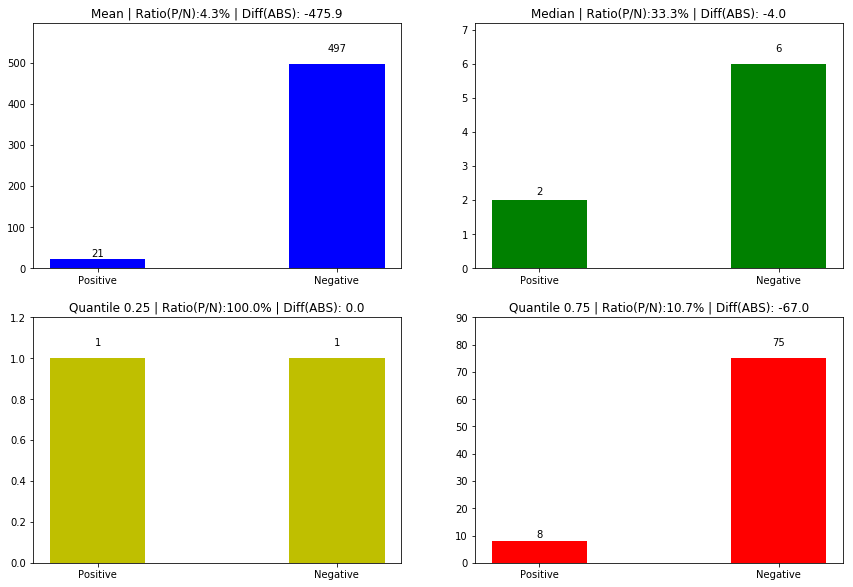

In [10]:
plot_bar("Sent_tnx")

⚠️ We can see that `Sent Transactions` is significantly higher in `Non-Fraud` transactions

#### Average of Unique Sent to Addresses

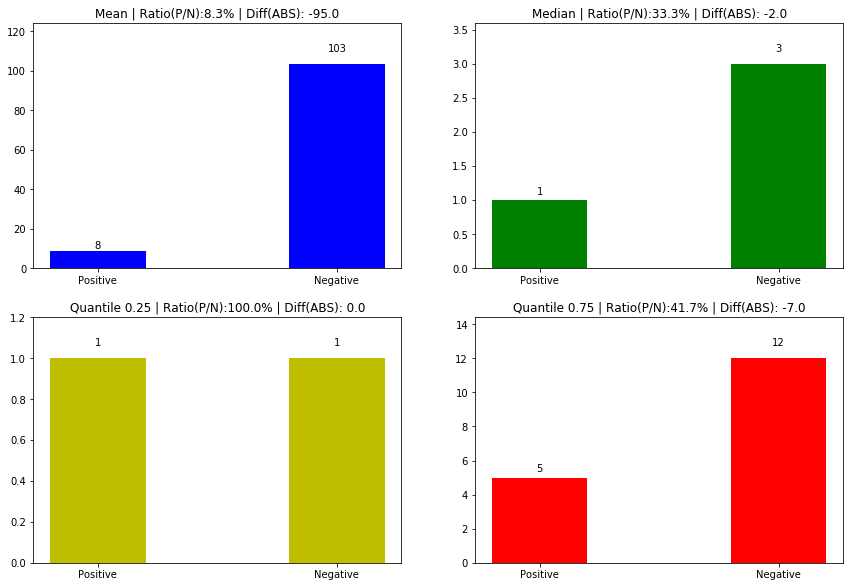

In [11]:
plot_bar("Average_of_Unique_Sent_To_Addresses")

⚠️ We can see that `Average of Unique Sent to Addresses` is significantly higher in `Non-Fraud` transactions

### Correlation Between Features

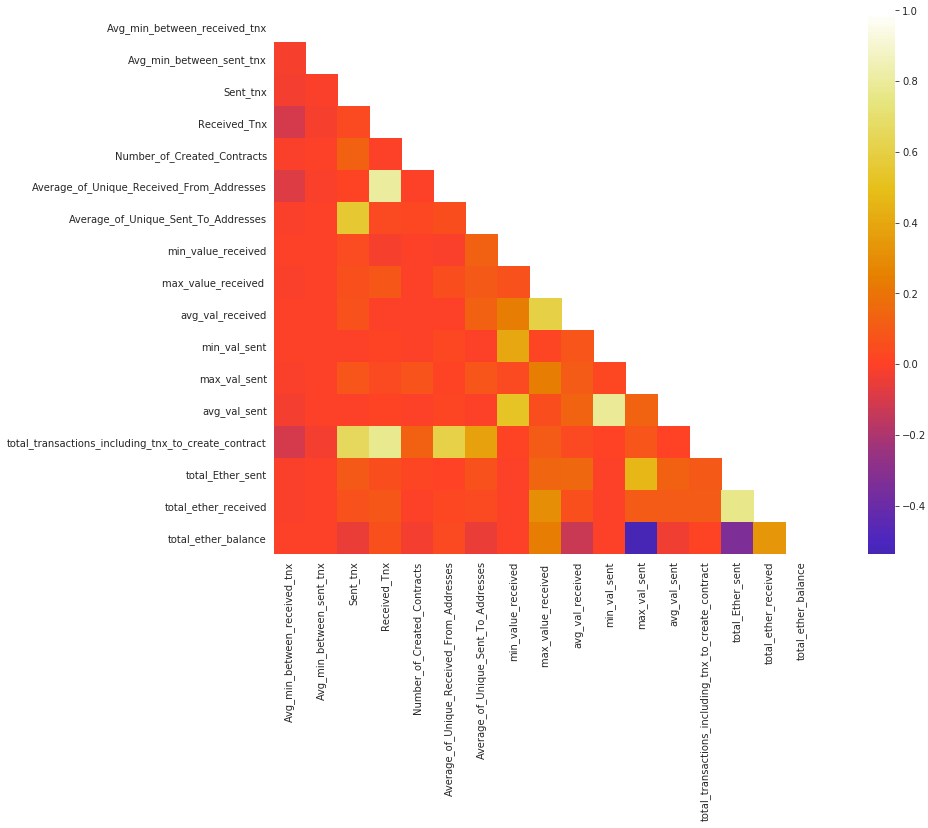

In [12]:
df.drop("Flag", axis=1, inplace=True)
df.drop("Address", axis=1, inplace=True)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

### Features Distribution

In [13]:
plot_col = 3
plot_row = math.ceil(len(df.columns) / plot_col)

def dist_plot(data_frame, plot_row, plot_col, figsize = (14, 14)):
    fig, axes = plt.subplots(plot_row, plot_col, figsize=figsize, constrained_layout =True)
    row = 0
    col = 0
    for i in range(len(data_frame.columns)):
        sns.boxplot(ax = axes[row,col], data=data_frame, x=data_frame.columns[i])
        col += 1
        if col == 3:
            col = 0
            row += 1

#### All

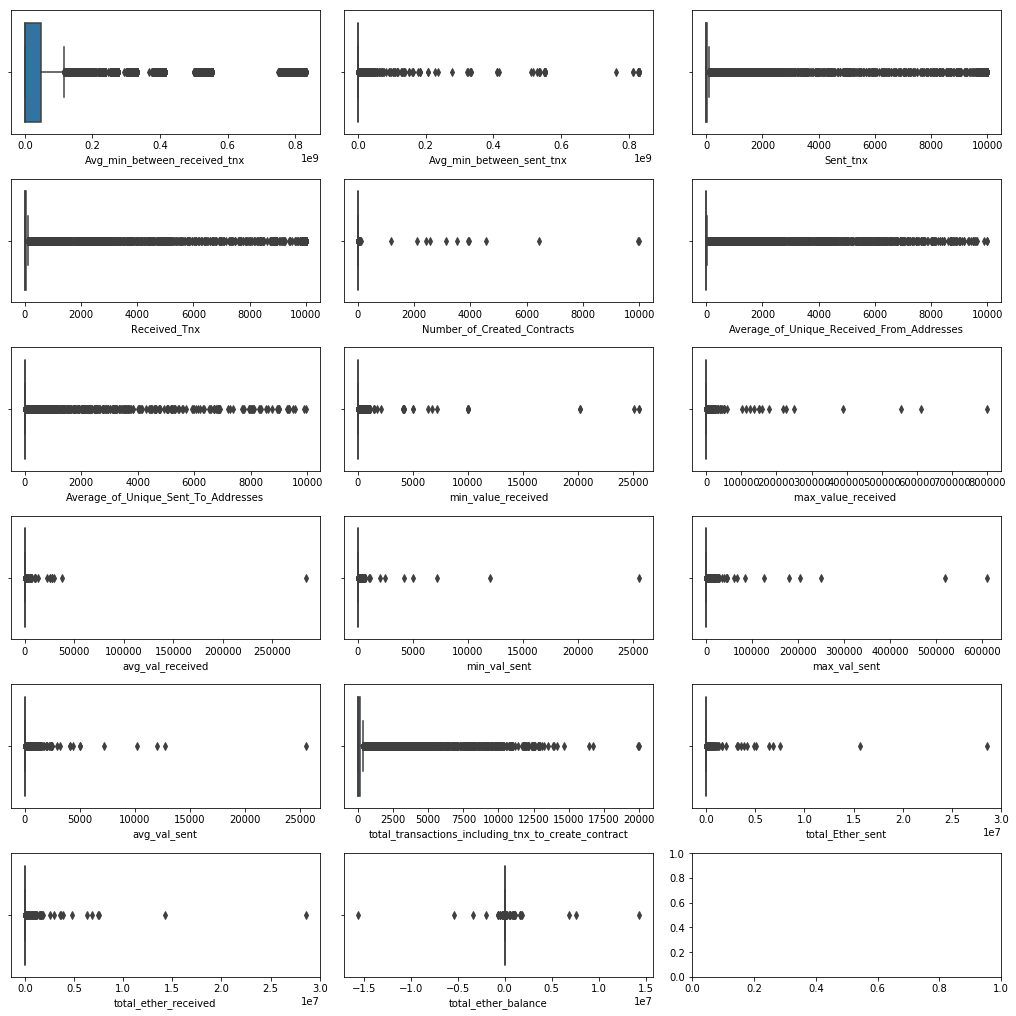

In [14]:
dist_plot(df, plot_row, plot_col)

#### Fraud Cases

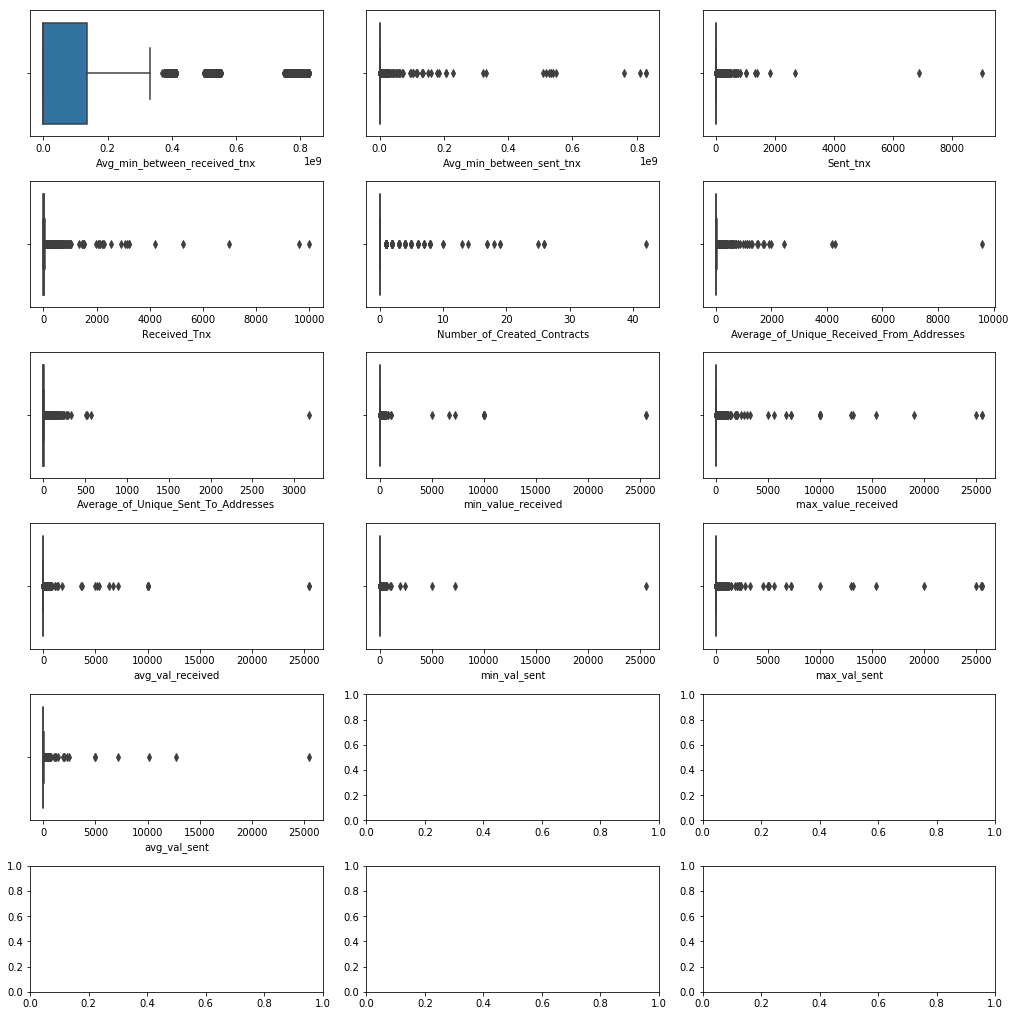

In [15]:
positive_sample = positive_sample.iloc[:,2:-4]
dist_plot(positive_sample, plot_row, plot_col)

#### Non-Fraud Cases

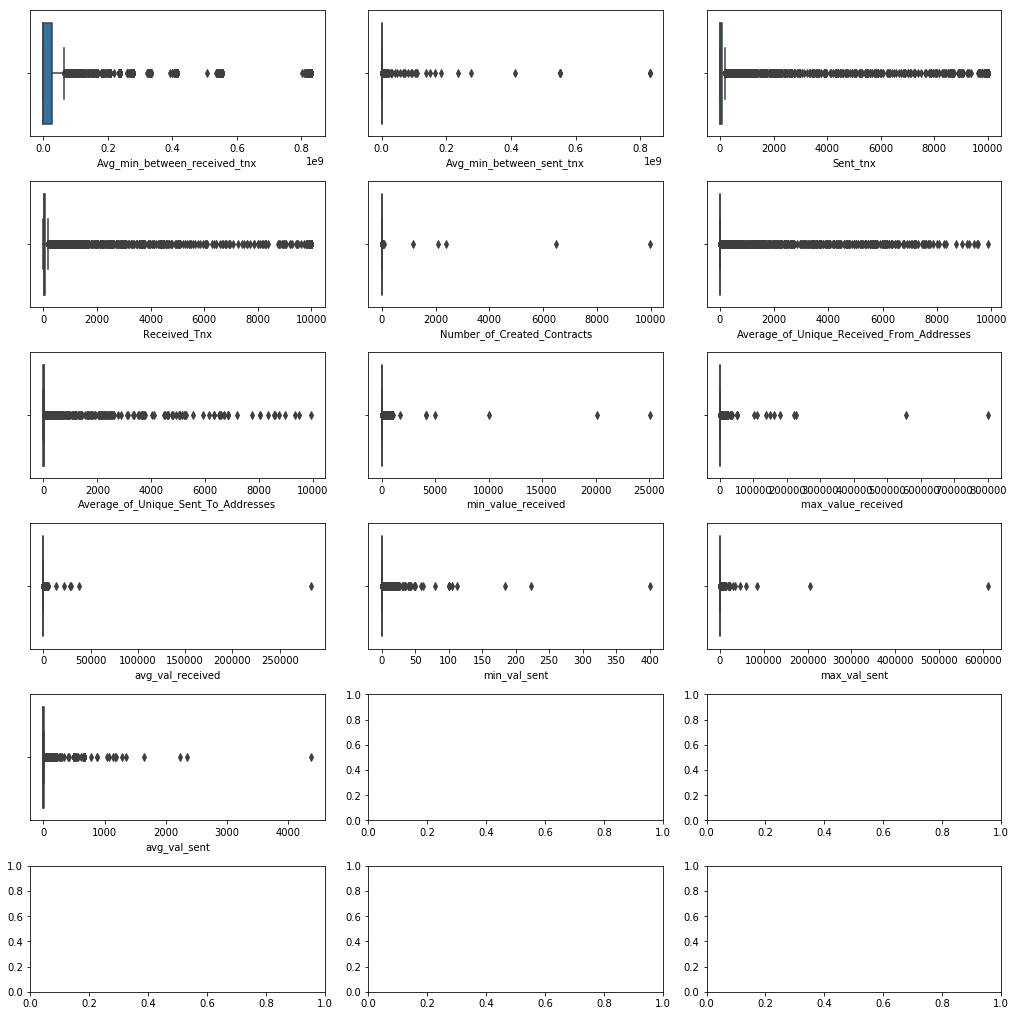

In [16]:
negative_sample = negative_sample.iloc[:,2:-4]
dist_plot(negative_sample, plot_row, plot_col)